# Práctica 7 – Clustering con K-Means (Anime Dataset)

En esta práctica realizaremos un análisis NO supervisado usando **K-Means** con el objetivo de encontrar grupos naturales en el dataset.

Vamos a:
- Seleccionar variables numéricas.
- Escalar los datos.
- Probar diferentes valores de K.
- Graficar la inercia (método del codo).
- Entrenar el modelo final.
- Visualizar los clusters.
- Interpretar resultados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/Anime_clean.csv")
df.head()


,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1.0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,24.0,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2.0,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3.0,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5.0,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [2]:
X = df[["Episodes", "Rating", "Release_year", "Rank"]]

# Drop de NaN
X = X.dropna()

X.shape


(8482, 4)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[ 0.13093653,  2.90128497,  1.12548487, -1.61266702],
       [-0.1809193 ,  2.90128497,  1.12548487, -1.61244629],
       [-0.20926983,  2.85347161,  1.12548487, -1.61222556],
       [ 1.26495772,  2.85347161,  0.12135328, -1.61200483],
       [-0.26597088,  2.82956493,  0.9581296 , -1.6117841 ]])

In [4]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

inertia


C:\Users\hmisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hmisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

[33928.000000000015,
 22424.710625219905,
 16654.31318115529,
 12852.680434818893,
 10594.56100789718,
 9261.146502597157,
 8230.287736858943,
 7391.242296128942,
 6607.057569520576,
 6119.247678298158]

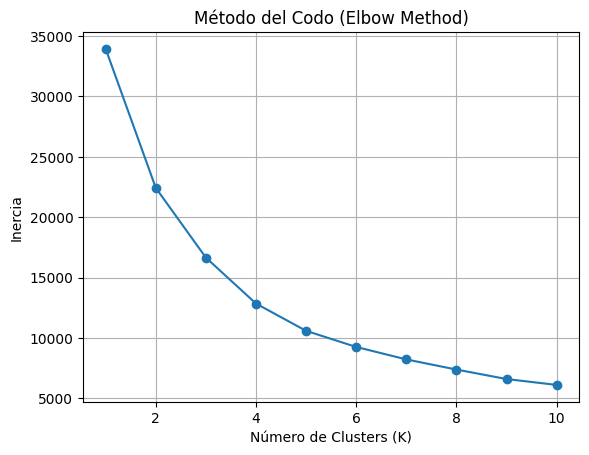

In [5]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo (Elbow Method)")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.grid()
plt.show()


In [ ]:
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

clusters[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [7]:
df_clustered = X.copy()
df_clustered["Cluster"] = clusters

df_clustered.head()


,Episodes,Rating,Release_year,Rank,Cluster
0,24.0,4.60,2021.0,1.0,1
1,13.0,4.60,2021.0,2.0,1
2,12.0,4.58,2021.0,3.0,1
3,64.0,4.58,2009.0,4.0,1
4,10.0,4.57,2019.0,5.0,1


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_clustered["PCA1"] = pca_result[:, 0]
df_clustered["PCA2"] = pca_result[:, 1]


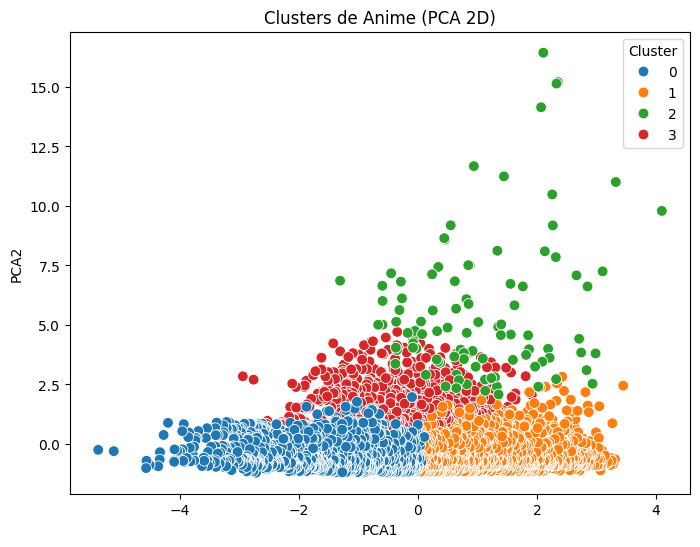

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_clustered,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="tab10",
    s=60
)
plt.title("Clusters de Anime (PCA 2D)")
plt.show()


In [10]:
df_clustered.groupby("Cluster").mean()


,Episodes,Rating,Release_year,Rank,PCA1,PCA2
Cluster,,,,,,
0,10.795061,3.004144,2011.439705,11890.622194,-1.320218,-0.425572
1,16.834510,3.733558,2013.269415,3150.287207,1.274402,-0.365254
2,254.683673,3.511429,1994.051020,5764.244898,1.058733,5.556829
3,26.762319,3.357670,1989.544348,7642.813333,-0.289840,1.203321


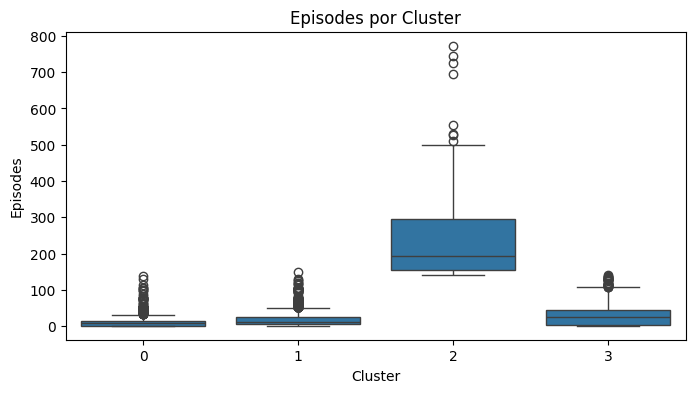

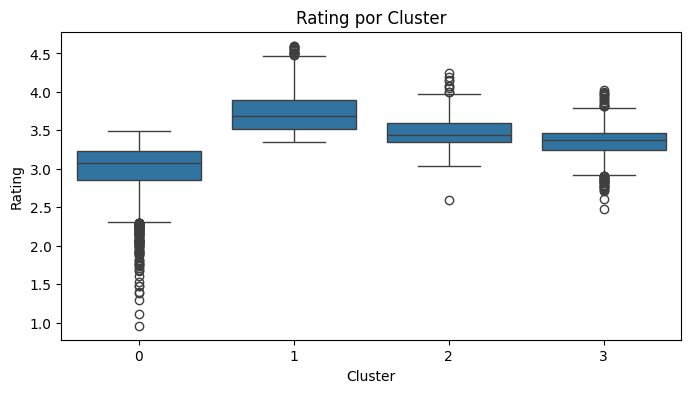

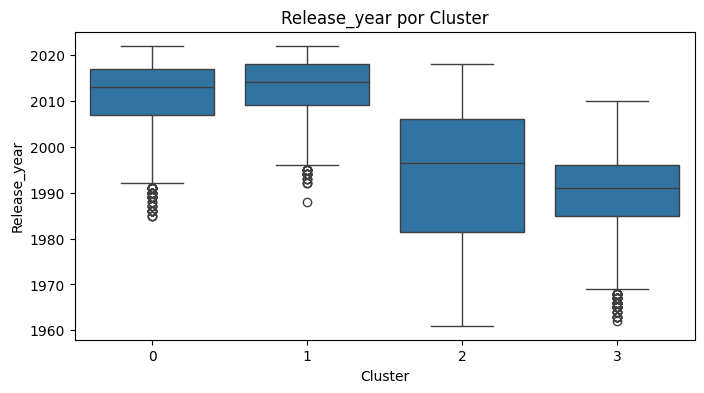

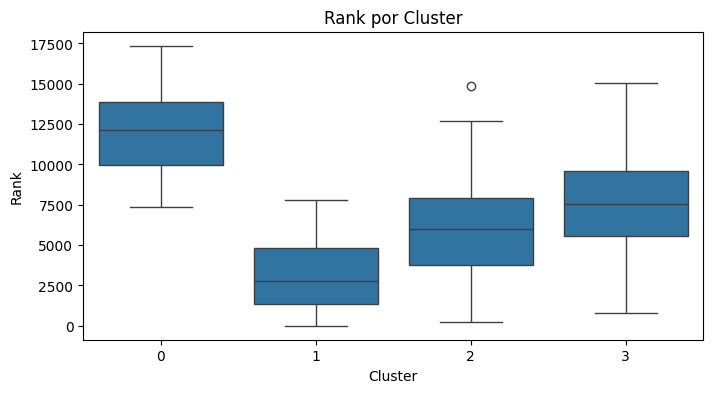

In [11]:
num_cols = ["Episodes", "Rating", "Release_year", "Rank"]

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Cluster", y=col, data=df_clustered)
    plt.title(f"{col} por Cluster")
    plt.show()
